# Deep Learning Week 4: NLP Disaster Tweets Kaggle Mini-Project

## 1. Brief description of the problem and data

In this week assignment, we'll participate in the Kaggle [NLP Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started) Challenge. We'll address this challenge by building deep learning models to predict which tweets are about real disasters and which ones are not based on the tweet content. For this week assignment, we'll focus on RNN (Recurrent Neural Network) models.

#### About the Dataset

We will be using the  Kaggle [NLP Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started) dataset. The dataset is provided subjected to Kaggle [Competition Rules](https://www.kaggle.com/competitions/nlp-getting-started/rules#7-competition-data).

**Files**

- train.csv - the training set
- test.csv - the test set
- sample_submission.csv - a sample submission file in the correct format

**Columns**

- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0).

#### Summary of Tasks:
- Load dataset
- Explore the dataset, perform data cleaning, data analysis, preprocess data
- Build and test models: Build, evaluate, and compare model's performances. 
- Summarize and discuss the results.

## 2. Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

In this section, We'll explore the dataset, perform data cleaning, data analysis, and text processing.

### 2.0. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras import models, layers, callbacks, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 2.1. Load Disaster Tweets Dataset

In [2]:
df_train_full = pd.read_csv('nlp-getting-started/train.csv')
df_test = pd.read_csv('nlp-getting-started/test.csv')

### 2.2. Explore the Dataset

In [3]:
df_train_full

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
print("Number of training samples:", df_train_full.shape[0])
print("Number of columns:", df_train_full.shape[1])

Number of training samples: 7613
Number of columns: 5


In [5]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [6]:
print("Number of test samples:", df_test.shape[0])
print("Number of columns:", df_test.shape[1])

Number of test samples: 3263
Number of columns: 4


In [7]:
# Set pd's display.max_colwidth to 'None' so that we can see full content
pd.set_option('display.max_colwidth', None)
df_train_full.sample(10)

,id,keyword,location,text,target
10,16,NaN,NaN,Three people died from the heat wave so far,1
763,1104,blew%20up,NaN,I blew up snapchat for no reason ??,0
6863,9835,trauma,"Minneapolis, MN",Both kids got haircuts w minimal trauma. Clearly that calls for wine,0
6163,8789,siren,The American Wasteland (MV),@FEVWarrior -with the screeching siren accompanying it just before he walked out.,0
2891,4154,drown,East Coast,We all carry these things inside that no one else can see. They hold us down like anchors they drown us out at sea.,0
3939,5600,flood,United States,Flood Advisory issued August 05 at 4:28PM EDT by NWS http://t.co/D02sbM0ojs #WxKY,1
7180,10289,weapon,"BROOKLYN, NYC",Please allow me to reiterate it's not the weapon it's the mindset of the individual! #professional #help! -LEGION! https://t.co/2lGTZkwMqW,1
6490,9278,sunk,NYC,&lt;&lt; his lip as he sunk into the bed his arms crossed behind his head as he watched his Captain do a number on his body. @ResoluteShield,0
3389,4852,evacuation,"Bend, Oregon",Update: More from Bend FD on how a natural gas line cut prompted evacuation of the main Post Office this afternoon http://t.co/wMmkIrJ0Hw,1
5246,7502,oil%20spill,Amarillo,'California: Spring Oil Spill Estimate Grows ' by THE ASSOCIATED PRESS via NYT http://t.co/6Cx46E7QB7,1


### 2.3. Duplicate Entries and Null Values

In [8]:
# Check duplicate
print("Number of duplicate entries:", df_train_full.duplicated().sum())

Number of duplicate entries: 0


In [9]:
# Check null values
for col in df_train_full.columns:
    null_count = df_train_full[col].isnull().sum()
    percent = 100*null_count/len(df_train_full)
    print(f"Number of null values in colum '{col}': {null_count} ({percent:.2f}%)")

Number of null values in colum 'id': 0 (0.00%)
Number of null values in colum 'keyword': 61 (0.80%)
Number of null values in colum 'location': 2533 (33.27%)
Number of null values in colum 'text': 0 (0.00%)
Number of null values in colum 'target': 0 (0.00%)


In [10]:
# Check null values
for col in df_test.columns:
    null_count = df_test[col].isnull().sum()
    percent = 100*null_count/len(df_test)
    print(f"Number of null values in colum '{col}': {null_count} ({percent:.2f}%)")

Number of null values in colum 'id': 0 (0.00%)
Number of null values in colum 'keyword': 26 (0.80%)
Number of null values in colum 'location': 1105 (33.86%)
Number of null values in colum 'text': 0 (0.00%)


As we can see, about 33% of tweets are not associated with a location, 0.8% of tweets are not associated with a keyword. We'll drop 'location' column. And we'll fill missing keyword with 'unknown'.

In [11]:
df_train_full.drop(columns=['location'], inplace=True)
df_test.drop(columns=['location'], inplace=True)
df_train_full['keyword'] = df_train_full['keyword'].fillna('unknown')
df_test['keyword'] = df_test['keyword'].fillna('unknown')

In [12]:
df_train_full

,id,keyword,text,target
0,1,unknown,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,unknown,Forest fire near La Ronge Sask. Canada,1
2,5,unknown,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,unknown,"13,000 people receive #wildfires evacuation orders in California",1
4,7,unknown,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...
7608,10869,unknown,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,unknown,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,unknown,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


### 2.4. Number of #Hashtag in a Tweet

In [13]:
# Return the number of #hagtag in a tweet
def count_hagtags(tweet):
    return len(re.findall(r'#\w+',tweet))

# Add hashtag column
df_train_full['hashtag'] = df_train_full['text'].apply(lambda tweet: count_hagtags(tweet))

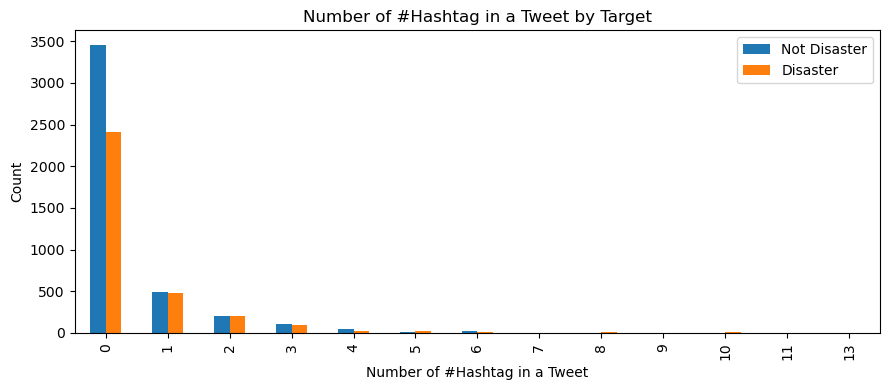

In [14]:
hashtag_vs_target_counts = df_train_full.groupby(['hashtag', 'target']).size().unstack()
_, ax = plt.subplots(figsize=(9, 4))
hashtag_vs_target_counts.plot(kind='bar', ax=ax)
plt.title('Number of #Hashtag in a Tweet by Target')
plt.legend(['Not Disaster', 'Disaster'])
plt.xlabel('Number of #Hashtag in a Tweet')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 2.5. Number of @Mention in a Tweet

In [15]:
# Return the number of @mention in a tweet
def count_mentions(tweet):
    return len(re.findall(r'@\w+',tweet))

# Add hashtag column
df_train_full['mention'] = df_train_full['text'].apply(lambda tweet: count_mentions(tweet))


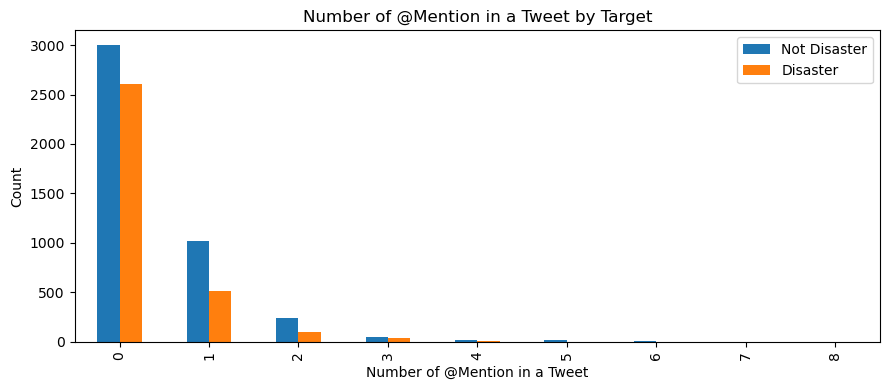

In [16]:
mention_vs_target_counts = df_train_full.groupby(['mention', 'target']).size().unstack()
_, ax = plt.subplots(figsize=(9, 4))
mention_vs_target_counts.plot(kind='bar', ax=ax)
plt.title('Number of @Mention in a Tweet by Target')
plt.legend(['Not Disaster', 'Disaster'])
plt.xlabel('Number of @Mention in a Tweet')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 2.6. Preprocess Text Data

We'll use Natural Language Toolkit (NLTK) library ([https://www.nltk.org](https://www.nltk.org)) for text processing and normalization. We'll remove @mentions, URLs, HTML tags, extra spaces, punctuations, numbers and so on from the tweets, and we'll apply lemmatization technique to reduce dimensionality and vocabulary size.

**Lemmatization** is the process of reducing words to their base form (or lemma). This technique considers the context and meaning of the word. So it needs more time and computational resources but is more accurate than the stemming method.

In [17]:
# Install Natural Language Toolkit
# !pip3 install -U nltk

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Expand contradictions.
# This function is generated by Google Gemini ;)
def expand_contractions(text):
    """
    Expands common English contractions in a given text.
    """
    contractions_map = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'd've": "I would have",
        "I'll": "I will",
        "I'll've": "I will have",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so is",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

    # Create a regex pattern to find all contractions in the text
    # This ensures we match full words and handle cases with punctuation correctly
    contractions_pattern = re.compile('({})'.format('|'.join(re.escape(key) for key in contractions_map.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def replace_contraction(match):
        contraction = match.group(0)
        expanded_form = contractions_map.get(contraction.lower())
        if expanded_form:
            # Preserve the case of the first letter if the contraction was capitalized
            if contraction[0].isupper():
                return expanded_form.capitalize()
            return expanded_form
        return contraction

    expanded_text = contractions_pattern.sub(replace_contraction, text)
    return expanded_text

def remove_stopword(text):
    return ' '.join([word for word in text.split() if word not in stopwords.words('english')])

def process_text(text):
    # to lower cases
    text = text.lower()
    # convert %20 -> space
    text = text.replace('%20',' ')
    # expand contractions 
    text = expand_contractions(text) 
    # remove url
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # remove HTML tag
    text = re.sub(r'<.*?>', '', text)
    # remove numbers
    text = re.sub(r'\w*\d\w*', '', text)
    # remove mentions
    text = re.sub(r'@\S+', '', text)
    # remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return remove_stopword(text)
   
class TextProcessing():
    def __init__(self):
        # create wordnet lemmatizer object
        self.lemmatizer = WordNetLemmatizer()
        
    def lemmatize(self, text):
        words = [self.lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stopwords.words('english')]
        return ' '.join(words)
        
    def process_text(self, text):
        # to lower cases
        text = text.lower()
        # convert %20 -> space
        text = text.replace('%20',' ')
        # expand contractions 
        text = expand_contractions(text) 
        # remove url
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        # remove HTML tag
        text = re.sub(r'<.*?>', '', text)
        # remove numbers
        text = re.sub(r'\w*\d\w*', '', text)
        # remove mentions
        text = re.sub(r'@\S+', '', text)
        # remove punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        # remove extra spaces
        text = re.sub(r'\s+', ' ', text)
        return remove_stopword(text)
        #return self.lemmatize(text)
        
tp = TextProcessing()

df_train_full['clean_text'] = df_train_full['text'].apply(process_text)
df_train_full['clean_keyword'] = df_train_full['keyword'].apply(process_text)
df_test['clean_text'] = df_test['text'].apply(process_text)
df_test['clean_keyword'] = df_test['keyword'].apply(process_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dongnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df_train_full.sample(10)

,id,keyword,text,target,hashtag,mention,clean_text,clean_keyword
5070,7228,natural%20disaster,@ConnorFranta #AskConnor if you were a natural disaster what would you be?,0,1,1,askconnor natural disaster would,natural disaster
3253,4674,engulfed,Why are you engulfed by low self-image? Take the quiz: http://t.co/CImUbwEyiB http://t.co/9R5FstS7Bd,0,0,0,engulfed low selfimage take quiz,engulfed
2324,3340,demolished,@stallion150 @kbeastx they totally demolished genisys which was a beautiful film and almost 90% of the people agreed,1,0,2,totally demolished genisys beautiful film almost people agreed,demolished
6533,9344,survived,@TheDailyShow Mahalo nui loa for making my 20s. My generation could not have survived the (W.) Bush years without you. #JonVoyage #holomua,0,2,1,mahalo nui loa making generation could survived w bush years without jonvoyage holomua,survived
3447,4926,exploded,Just saw The Man Whose Mind Exploded. There should be a Drako Zarharzar day.,0,0,0,saw man whose mind exploded drako zarharzar day,exploded
3427,4900,explode,what if i want to fuck the duck until explode. it could be greasy,0,0,0,want fuck duck explode could greasy,explode
2884,4145,drought,LLF TALK WORLD NEWS U.S. in record hurricane drought - The United States hasn't been hit by a major hurricane in ... http://t.co/ML8IrhWg7O,1,0,0,llf talk world news us record hurricane drought united states hit major hurricane,drought
2892,4156,drown,#NowPlaying Porcupine Tree - Drown With Me (Live) #Listen #Live at http://t.co/iyLVzy3Cob,0,3,0,nowplaying porcupine tree drown live listen live,drown
29,41,unknown,Do you like pasta?,0,0,0,like pasta,unknown
2228,3186,deluge,@FiendNikki 'Deluge' is such an awesome word. No idea why I like it so much,0,0,1,deluge awesome word idea like much,deluge


In [19]:
df_test.sample(10)

,id,keyword,text,clean_text,clean_keyword
2863,9487,terrorism,Truth...\nhttps://t.co/n1K5nlib9X\n#News\n#BBC\n#CNN\n#Islam\n#Truth\n#god\n#ISIS\n#terrorism\n#Quran\n#Lies http://t.co/CGz84MUOCZ,truth news bbc cnn islam truth god isis terrorism quran lies,terrorism
2045,6871,mass%20murder,Plane debris is from #MH370 - it was a controlled crash. In other words it was mass murder by a musim http://t.co/J3xFDg9CWF @newscomauHQ,plane debris controlled crash words mass murder musim,mass murder
582,1894,burning,Peddle to the floorboard.. End up in a four door. Burning up a backroad song... Park it and we pile outÛ_ Baby watch your step nowÛ_,peddle floorboard end four door burning backroad song park pile outû baby watch step nowû,burning
2435,8139,rescued,New-born piglet running down a national speed limit road is rescued #oink #Dorset http://t.co/dOMvOx2Oui http://t.co/iEVdj6KBU2,newborn piglet running national speed limit road rescued oink dorset,rescued
3210,10654,wounds,Time heals all wounds. And if it doesn't you name them something other than wounds and agree to let them stay. ????,time heals wounds name something wounds agree let stay,wounds
250,813,battle,@JackiSheaffer I have the same battle!,battle,battle
3240,10781,wreckage,RT @australian Debris found on an Indian Ocean island confirmed to be from flight #MH370. http://t.co/gY9MrSl6x2,rt debris found indian ocean island confirmed flight,wreckage
3058,10133,upheaval,? http://t.co/5J8vHUXzrp #Ancient Mayan Tablet with Hieroglyphics Honors Lowly King #livescience #future Û_ http://t.co/n3aQXoMubu,ancient mayan tablet hieroglyphics honors lowly king livescience future û,upheaval
16,47,ablaze,@sunkxssedharry will you wear shorts for race ablaze ?,wear shorts race ablaze,ablaze
1138,3755,destruction,@PeterArnottGlas I've written a play about Dr Rae and his destruction by Lady Franklin as it happens. Commissioned by Mull Theatre,ive written play dr rae destruction lady franklin happens commissioned mull theatre,destruction


Now we have completed removing links, HMTL tags, @mentions, #hagtags, punctuations, common stopwords. We have also reduced words to their base or dictionary form (or lemma) by applying lemmatization technique.

### 2.7. Length of Tweets

In [20]:
# Add wordcount column
df_train_full['wordcount'] = df_train_full['clean_text'].apply(lambda s: len(s.split()))

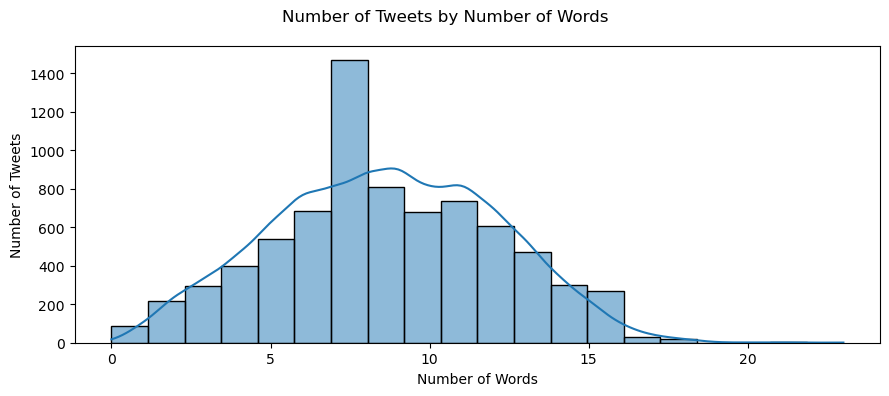

In [21]:
# Plot the Number of Tweets by Number of Words
fig, ax = plt.subplots(figsize=(9, 4))
fig.suptitle('Number of Tweets by Number of Words')
sns.histplot(df_train_full, x='wordcount', kde=True, bins=20, ax=ax)
ax.set(xlabel='Number of Words', ylabel="Number of Tweets")
plt.tight_layout()
plt.show()

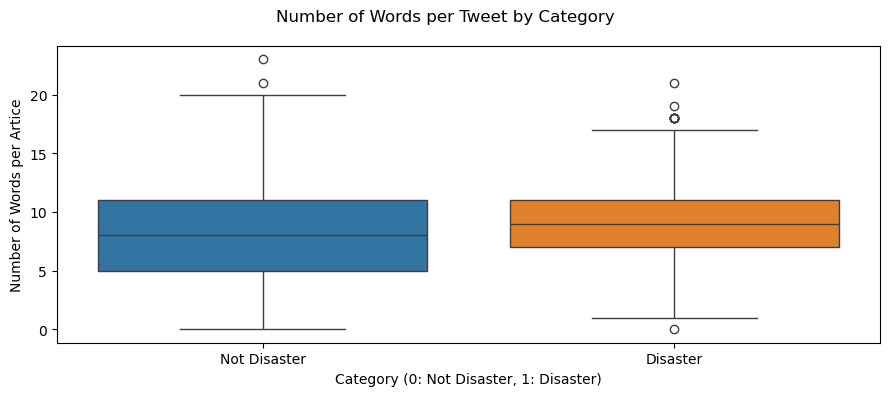

In [22]:
# Plot Number of Words per Tweet by Category
fig, ax = plt.subplots(figsize=(9, 4))
fig.suptitle('Number of Words per Tweet by Category')
sns.boxplot(ax=ax, data=df_train_full, x='target', y='wordcount', hue='target', legend=False)
ax.set(ylabel='Number of Words per Artice', xlabel='Category (0: Not Disaster, 1: Disaster)')
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])
plt.tight_layout()
plt.show()

As we can see from the bar and box graphs above, the majority of tweets has 5 to 12 words. The box plot shows that the length of a tweet does not correlate with the target, a short or long tweet does not indicate whether it is associated with a real disaster or not.

### 2.8. Top Keywords

Now let's see what are the top keywords associated with real disasters.

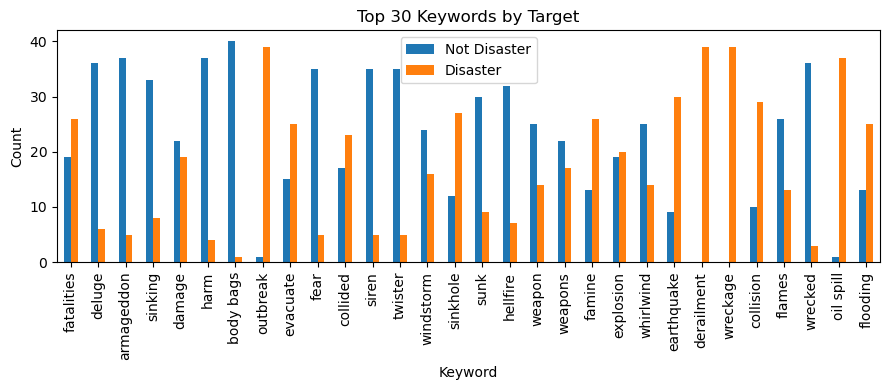

In [23]:
keyword_vs_target_counts = df_train_full[df_train_full['clean_keyword'] != 'unknown'].groupby(['clean_keyword', 'target']).size().unstack()
top_keywords = keyword_vs_target_counts.sum(axis=1).sort_values(ascending=False).head(30).index
_, ax = plt.subplots(figsize=(9, 4))
keyword_vs_target_counts.loc[top_keywords].plot(kind='bar', ax=ax)
plt.title('Top 30 Keywords by Target')
plt.legend(['Not Disaster', 'Disaster'])
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Here we can see words like *wreckage, derailment, outbreak, forest fire, collision* are often associated with real disasters while words like *harm, fear, wrecked, siren, body bag* are often associated with false disasters.

### 2.9. Correlation Heatmap

Now we want to see if there is any correlation between the number of hashtags in a tweet, the number of mentions in a tweet, or the length of a tweet with the target.

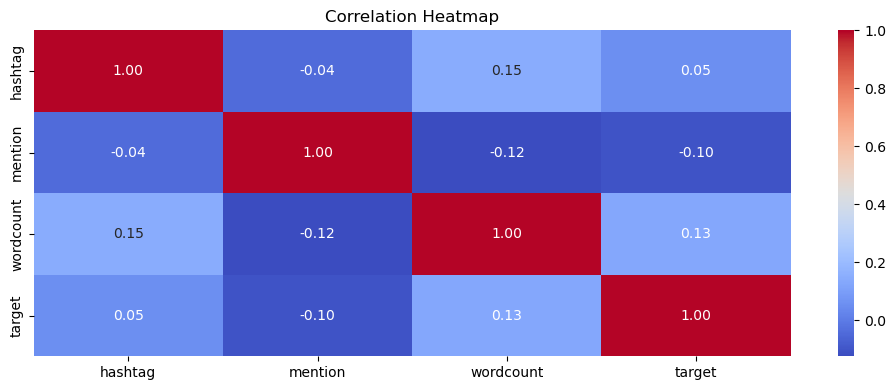

In [24]:
# Select numerical columns and display the correlation heatmap
df = df_train_full[['hashtag', 'mention', 'wordcount', 'target']]
#df = df_train_full.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

The correlation heatmap indicates that there is no (or very weak) correlation between the number of hashtags, number of mentions or the length of a tweet with the target. So we will ignore these features.

### 2.10. Target Distribution

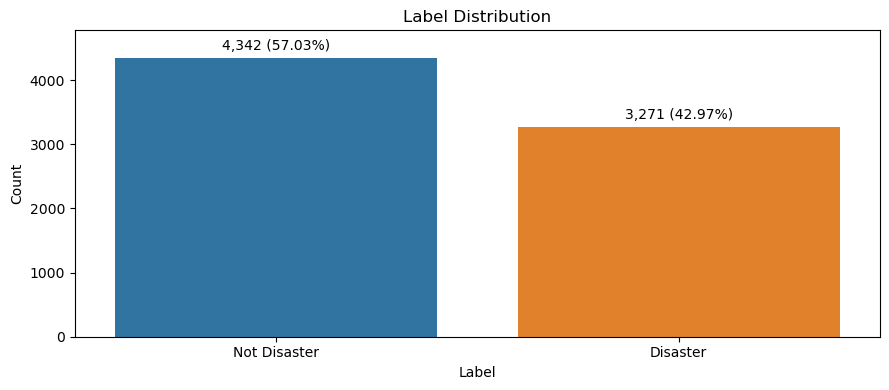

In [25]:
# Display label distribution
labels, counts = np.unique(df_train_full['target'], return_counts=True)
n_labels = counts.sum()
plt.figure(figsize=(9,4))
ax = sns.countplot(data=df_train_full, x='target', hue='target', legend=None)
for p in ax.patches:
    count = p.get_height()
    percent = 100 * count / n_labels
    ptitle = f'{count:,.0f} ({percent:.2f}%)'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + n_labels/100, ptitle, ha='center', va='bottom', fontsize=10)
plt.title("Label Distribution")
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])
plt.xlabel("Label")
plt.ylabel("Count")
plt.ylim(0, counts.max() * 1.1)
plt.tight_layout()
plt.show()

The label distribution shows that our dataset is just slightly imbalanced.

## 3. RNN Models

We're going to addresses this challenge by building a deep learning model that can detect whether a tweet is about a real disaster (1) or not (0) base on the associated keyword and the tweet content using recurrent neural networks (RNN). We'll try Vanilla RNN and Gated Recurrent Unit (GRU). We choose GRU over Long Short-Term Memory (LSTM) models because GRUs provide a balance between performance and efficiency. They are simpler and faster to train than LSTMs while still effectively addressing the vanishing gradient problem. They are less prone to overfitting on smaller datasets compared to LSTMs (our dataset is fairly small).

### 3.1. Helper Functions

In [26]:
# Build RNN model
def build_rnn_model(name, input_shape, input_dim, output_dim, units, model_type='simple', regularizer=None, dropout=0.0, recurrent_dropout=0.0):
    # Input layers
    text_input = layers.Input(shape=input_shape, name='text_input')
    keyword_input = layers.Input(shape=input_shape, name='keyword_input')
    # Embbeding layers
    text_embedding = layers.Embedding(input_dim=input_dim, 
                                      output_dim=output_dim,
                                      name='text_embedding')(text_input)
    keyword_embedding = layers.Embedding(input_dim=input_dim,
                                         output_dim=output_dim, 
                                         name='keyword_embedding')(keyword_input)
    # Concatenation of Embedded Inputs
    text_keyword_embedding = layers.Concatenate(axis=-1, name='text_keyword_embedding')([text_embedding, keyword_embedding])
    # Recurrent layers
    if model_type=='gru':
        rnn_output = layers.GRU(
            units=units, 
            name='gru_layer',
            dropout=dropout, 
            recurrent_dropout=recurrent_dropout,
            kernel_regularizer=regularizer,
            recurrent_regularizer=regularizer,
            bias_regularizer=regularizer
        )(text_keyword_embedding)
    else: 
        # Simple RNN
        rnn_output = layers.SimpleRNN(
            units=units, 
            name='rnn_layer',
            dropout=dropout, 
            recurrent_dropout=recurrent_dropout,
            kernel_regularizer=regularizer,
            recurrent_regularizer=regularizer,
            bias_regularizer=regularizer
        )(text_keyword_embedding)
    # Output layer
    output = layers.Dense(1, activation='sigmoid', name='output')(rnn_output)
    
    # return model
    return models.Model(name=name, inputs=[text_input, keyword_input], outputs=output)

# Compile & fit
def compile_and_fit(model, tfds_train, tfds_val, num_epochs, batch_size, lr=1e-3, verbose=1):
    # Setup callbacks
    model_cbs = [
        # Stop training if performance doesn't improve
        callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=5, 
            restore_best_weights=True, 
            verbose=verbose
        ),
        # Reduce learning rate on plateau
        callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            patience=2, 
            factor=0.2, 
            min_lr=1e-6,
            verbose=verbose
        ),
        # Save best model
        callbacks.ModelCheckpoint(
            filepath=f'{model.name}.keras',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=verbose
        )
    ]
    from tensorflow.keras import metrics
    # Complie model
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr), 
        loss='binary_crossentropy', 
        metrics=['accuracy']
    )

    # Fit model
    history = model.fit(
        tfds_train,
        epochs=num_epochs,
        validation_data=tfds_val,
        callbacks=model_cbs,
        batch_size=batch_size,
        verbose=verbose
    )
    return history

# Plot model traning history & validation results
def plot_model_history(training_history):
    model_hist = training_history.history
    epochs = [epoch+1 for epoch in training_history.epoch]

    plt.figure(figsize=(9, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, model_hist['loss'], label='Train Loss')
    plt.plot(epochs, model_hist['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend(loc='lower left')
    plt.legend()
    
    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, model_hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, model_hist['val_accuracy'], label='Val Accuracy')
    #plt.ylim(0.5,1.05)
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix_result(y_true, y_pred, labels=['0', '1'], dataset='Training'):
    plt.figure(figsize=(9, 6))
    cm = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=plt.cm.Blues,
        xticklabels=labels,
        yticklabels=labels
    )
    plt.title(f'Confusion Matrix on {dataset} Dataset')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    ax.xaxis.tick_top()
    plt.tight_layout()
    plt.show()

# Create Kaggle submission
def create_submission(model, X_test, X_test_id, batch_size, print_samples=True):
    # Create submission
    y_test_prob = model.predict(X_test, batch_size=batch_size, verbose=1)
    y_test_pred = (y_test_prob >= 0.5).astype(int).flatten()
    submission_df = pd.DataFrame({'id': X_test_id,'target': y_test_pred})
    filename = 'submission-' + model.name + '.csv'
    submission_df.to_csv(filename, index=False)
    # Print submission samples
    if print_samples:
        print(f"\nSubmission file: {filename}\n")
        print(f"Sample of submission content:\n{submission_df.head()}")

# used to store model performance data
performance_data = {
    'model': [],
    'train_time': [],
    'train_epoch': [],
    'val_accuracy': [],
    'val_f1_score': [],
    'test_score': [],
}

### 3.2. Prepare Data for Training and Validation

**Split Data into Training and Validation Sets**

In [27]:
TEST_SIZE = 0.2 # training: 80%, validation: 20%
df_train, df_val = train_test_split(
    df_train_full, test_size=TEST_SIZE, random_state=42, stratify=df_train_full['target']
)
train_text, val_text = df_train['clean_text'].to_list(), df_val['clean_text'].to_list()
train_keyword, val_keyword = df_train['clean_keyword'].to_list(), df_val['clean_keyword'].to_list()
y_train, y_val = df_train['target'].to_list(), df_val['target'].to_list()
test_text = df_test['clean_text'].to_list()
test_keyword = df_test['clean_keyword'].to_list()

**Tokenize and Pad Sequences**

In [28]:
num_words = 10000 # max words in vocab

# Build the vocabulary from the tweets
tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
tokenizer.fit_on_texts(
    train_text + train_keyword + val_text + val_keyword
)
print('Number of vocabulary words:', num_words)

# Convert text to sequences
train_text_sequences = tokenizer.texts_to_sequences(train_text)
val_text_sequences = tokenizer.texts_to_sequences(val_text)
test_text_sequences = tokenizer.texts_to_sequences(test_text)
train_keyword_sequences = tokenizer.texts_to_sequences(train_keyword)
val_keyword_sequences = tokenizer.texts_to_sequences(val_keyword)
test_keyword_sequences = tokenizer.texts_to_sequences(test_keyword)

# Make all sequences the same length by padding
max_sequence_length = max(
    max(len(seq) for seq in train_text_sequences),
    max(len(seq) for seq in val_text_sequences),
    max(len(seq) for seq in test_text_sequences),
    max(len(seq) for seq in train_keyword_sequences),
    max(len(seq) for seq in val_keyword_sequences),
    max(len(seq) for seq in test_keyword_sequences)
)
print(f"Longest text sequence length: {max_sequence_length}")

X_train_text_seq = pad_sequences(train_text_sequences, maxlen=max_sequence_length)
X_val_text_seq = pad_sequences(val_text_sequences, maxlen=max_sequence_length)
X_test_text_seq = pad_sequences(test_text_sequences, maxlen=max_sequence_length)
X_train_keyword_seq = pad_sequences(train_keyword_sequences, maxlen=max_sequence_length)
X_val_keyword_seq = pad_sequences(val_keyword_sequences, maxlen=max_sequence_length)
X_test_keyword_seq = pad_sequences(test_keyword_sequences, maxlen=max_sequence_length)

Number of vocabulary words: 10000
Longest text sequence length: 23


**Create TensorFlow Datasets**

In [29]:
# Check tensorflow version & GPU support
print("Tensorflow version " + tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')

# Set batch size
BATCH_SIZE = 32
TRAIN_EPOCHS = 10
if len(physical_devices) > 0:
    print(physical_devices)
    BATCH_SIZE = 128
    TRAIN_EPOCHS = 30
    tf.keras.mixed_precision.set_global_policy('mixed_float16')
else:
    print("No GPU available!")

# Set random seed
RANDOM_SEED = 42
tf.random.set_seed(RANDOM_SEED)

print(f'\nBatch size: {BATCH_SIZE}')
print(f'Number of training epochs: {TRAIN_EPOCHS}')

Tensorflow version 2.19.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Batch size: 128
Number of training epochs: 30


In [30]:
# Create tensorflow training dataset
tfds_train = tf.data.Dataset.from_tensor_slices((
        {'text_input': X_train_text_seq, 'keyword_input': X_train_keyword_seq},
        y_train
)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
# Create tensorflow validation dataset
tfds_val = tf.data.Dataset.from_tensor_slices((
        {'text_input': X_val_text_seq, 'keyword_input': X_val_keyword_seq},
        y_val
)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
# Create tensorflow test dataset
tfds_test = tf.data.Dataset.from_tensor_slices((
    {'text_input': X_test_text_seq, 'keyword_input': X_test_keyword_seq}
)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

2025-06-29 08:46:59.466421: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-06-29 08:46:59.466602: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-29 08:46:59.466606: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1751161619.466988 27410490 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1751161619.467309 27410490 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 3.3. Simple RNN

Now let's try with a very simple RNN model

**Build Model**

In [31]:
# Build model
simple_rnn_model = build_rnn_model(name='simple-rnn', 
                                   input_shape=(max_sequence_length,), 
                                   input_dim=num_words,
                                   regularizer='l2',
                                   output_dim=64, 
                                   units=32)

# Print model summary
print("Simple RNN Model Summary:")
simple_rnn_model.summary()

Simple RNN Model Summary:


Model: "simple-rnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 23)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keyword_input       │ (None, 23)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_embedding      │ (None, 23, 64)    │    640,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keyword_embedding   │ (None, 23, 64)    │    640,000 │ keyword_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_keyword_embed… │ (None, 23, 128)   │          0 │ text_embedding[0… │
│ (Concatenate)       │                   │            │ keyword_embeddin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rnn_layer           │ (None, 32)        │      5,152 │ text_keyword_emb… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         33 │ rnn_layer[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,285,185 (4.90 MB)

 Trainable params: 1,285,185 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

**Train Model**

In [32]:
time0 = time.time()
simple_rnn_model_history = compile_and_fit(simple_rnn_model, tfds_train, tfds_val, TRAIN_EPOCHS, BATCH_SIZE, verbose=1)
time1 = time.time() - time0
print(f"Training time: {time1:.1f} seconds")

Epoch 1/30


2025-06-29 08:47:00.292018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
E0000 00:00:1751161620.303810 27410490 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5795 - loss: 1.4170
Epoch 1: val_accuracy improved from -inf to 0.72620, saving model to simple-rnn.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 335ms/step - accuracy: 0.5804 - loss: 1.4148 - val_accuracy: 0.7262 - val_loss: 1.0983 - learning_rate: 0.0010
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.8020 - loss: 0.9777
Epoch 2: val_accuracy improved from 0.72620 to 0.78201, saving model to simple-rnn.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 324ms/step - accuracy: 0.8021 - loss: 0.9763 - val_accuracy: 0.7820 - val_loss: 0.8150 - learning_rate: 0.0010
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.8759 - loss: 0.6541
Epoch 3: val_accuracy improved from 0.78201 to 0.78529, saving model to simple-rnn.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 317ms/step - accuracy: 0.8760 - loss: 0.6533 - val_accuracy: 0.7853 - val_loss: 0.7388 - learning_rate: 0.0010
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy:

**Training History: Model Loss & Accuracy**

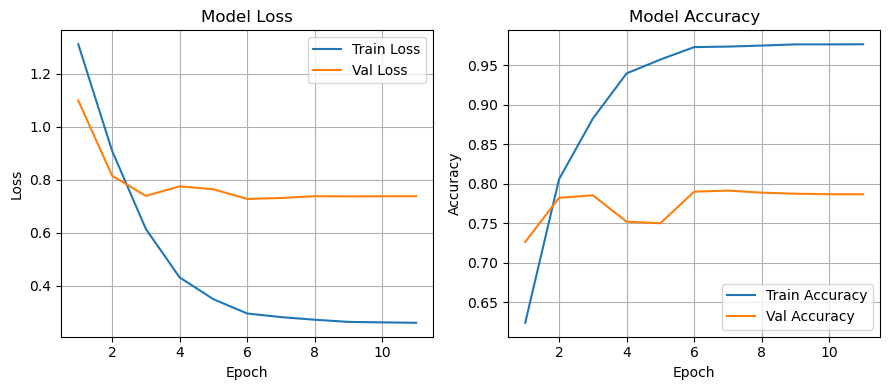

In [33]:
plot_model_history(simple_rnn_model_history)

From above graph, we can see that the training loss decreases initially but then increases and flattens out and shows little to no further improvement. This might indicate that the model is likely overfitting, vanishing gradient issue might occured.

**Classification Report & Confusion Matrix**

 3/12 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step 

E0000 00:00:1751161790.227008 27410490 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step

Classification Report on Validation Dataset:
              precision    recall  f1-score   support

Not Disaster       0.80      0.85      0.82       869
    Disaster       0.78      0.72      0.75       654

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



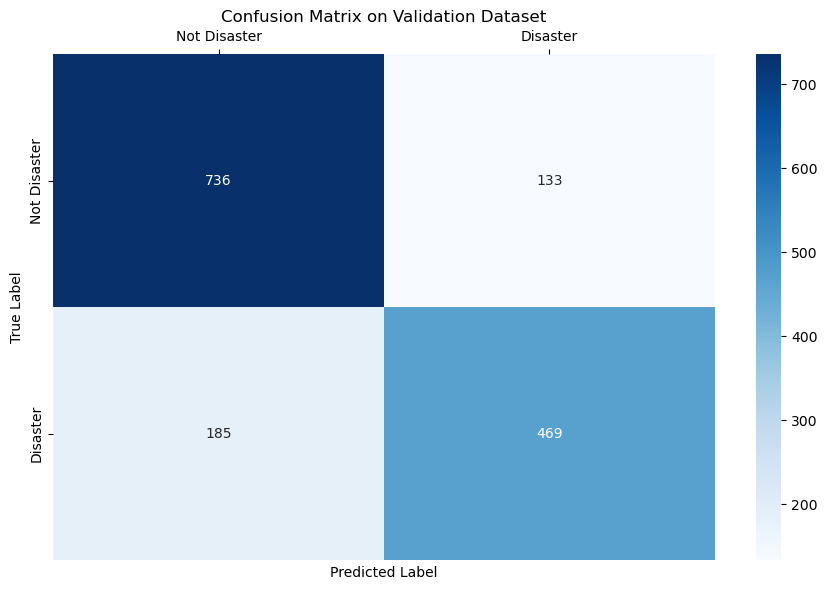

In [34]:
simple_rnn_model = models.load_model(f'{simple_rnn_model.name}.keras')
y_val_prob = simple_rnn_model.predict(tfds_val, batch_size=BATCH_SIZE, verbose=1)
y_val_pred = (y_val_prob >= 0.5).astype(int).flatten()
print("\nClassification Report on Validation Dataset:")
print(classification_report(y_val, y_val_pred, target_names=['Not Disaster', 'Disaster']))
# Plot confusion matrix result
plot_confusion_matrix_result(y_val, y_val_pred, labels=['Not Disaster', 'Disaster'], dataset='Validation')

**Submission & Test Results**

In [35]:
# Create submission
create_submission(simple_rnn_model, tfds_test, df_test['id'].values, batch_size=BATCH_SIZE)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step

Submission file: submission-simple-rnn.csv

Sample of submission content:
   id  target
0   0       0
1   2       1
2   3       1
3   9       1
4  11       1


Kaggle Public Score: 0.76984

In [ ]:
# Collect model performance data
performance_data['model'].append('Simple RNN')
performance_data['train_time'].append(int(time1))
performance_data['train_epoch'].append(len(simple_rnn_model_history.epoch))
performance_data['val_accuracy'].append(accuracy_score(y_val, y_val_pred))
performance_data['val_f1_score'].append(f1_score(y_val, y_val_pred))

### 3.4. Gated Recurrent Unit (GRU)

**Build Model**

In [37]:
# Build model
gru_model = build_rnn_model(name='gru', 
                            model_type='gru',
                            input_shape=(max_sequence_length,), 
                            input_dim=num_words,
                            regularizer='l2',
                            output_dim=64, 
                            units=32)

# Print model summary
print("GRU Model Summary:")
gru_model.summary()

GRU Model Summary:


Model: "gru"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 23)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keyword_input       │ (None, 23)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_embedding      │ (None, 23, 64)    │    640,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keyword_embedding   │ (None, 23, 64)    │    640,000 │ keyword_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_keyword_embed… │ (None, 23, 128)   │          0 │ text_embedding[0… │
│ (Concatenate)       │                   │            │ keyword_embeddin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_layer (GRU)     │ (None, 32)        │     15,552 │ text_keyword_emb… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         33 │ gru_layer[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,295,585 (4.94 MB)

 Trainable params: 1,295,585 (4.94 MB)

 Non-trainable params: 0 (0.00 B)

**Train Model**

In [38]:
time0 = time.time()
gru_model_history = compile_and_fit(gru_model, tfds_train, tfds_val, TRAIN_EPOCHS, BATCH_SIZE, verbose=1)
time1 = time.time() - time0
print(f"Training time: {time1:.1f} seconds")

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5549 - loss: 1.8315
Epoch 1: val_accuracy improved from -inf to 0.62246, saving model to gru.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5552 - loss: 1.8269 - val_accuracy: 0.6225 - val_loss: 1.2011 - learning_rate: 0.0010
Epoch 2/30
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6766 - loss: 1.0625
Epoch 2: val_accuracy improved from 0.62246 to 0.79186, saving model to gru.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6787 - loss: 1.0579 - val_accuracy: 0.7919 - val_loss: 0.7619 - learning_rate: 0.0010
Epoch 3/30
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8494 - loss: 0.6441
Epoch 3: val_accuracy improved from 0.79186 to 0.81221, saving model to gru.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8494 - loss: 0.6420 - val_accuracy: 0.8122 - val_loss: 0.5843 - learning_rate: 0.0010
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8936 - loss: 0.41

**Training Results: Model Loss & Accuracy**

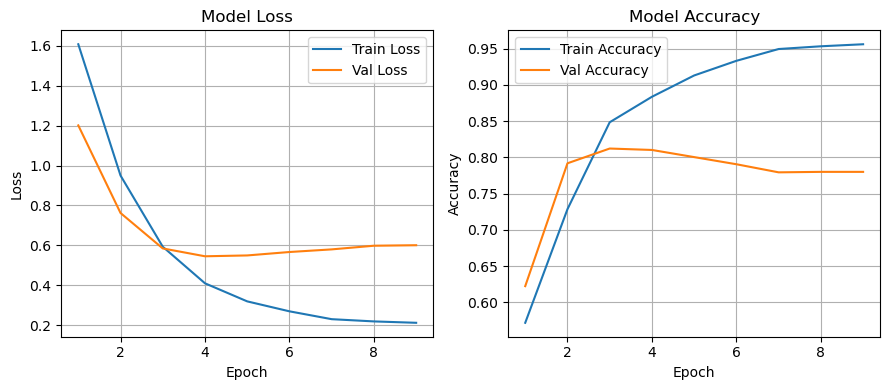

In [39]:
plot_model_history(gru_model_history)

Here we encounter the same issue as our previous model. From above graph, we can see that the training loss decreases initially but then increases and flattens out. The training stops after 9 epochs.

**Classification Report & Confusion Matrix**

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
              precision    recall  f1-score   support

Not Disaster       0.81      0.87      0.84       869
    Disaster       0.81      0.74      0.77       654

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.81      1523
weighted avg       0.81      0.81      0.81      1523



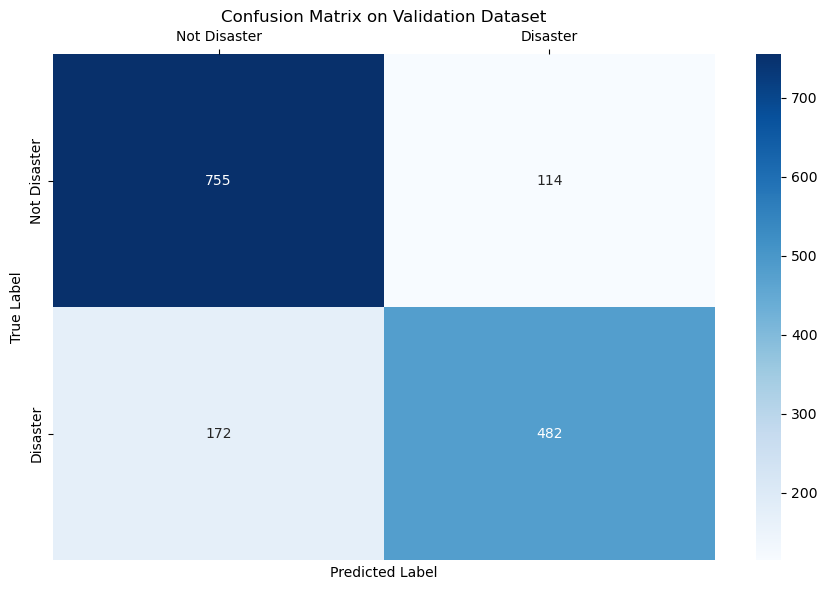

In [40]:

gru_model = models.load_model(f'{gru_model.name}.keras')
y_val_prob = gru_model.predict(tfds_val, batch_size=BATCH_SIZE, verbose=1)
y_val_pred = (y_val_prob >= 0.5).astype(int).flatten()
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=['Not Disaster', 'Disaster']))
# Plot confusion matrix result
plot_confusion_matrix_result(y_val, y_val_pred, labels=['Not Disaster', 'Disaster'], dataset='Validation')

**Submission & Test Results**

In [41]:
# Create kaggle submission
create_submission(gru_model, tfds_test, df_test['id'].values, batch_size=BATCH_SIZE)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Submission file: submission-gru.csv

Sample of submission content:
   id  target
0   0       1
1   2       1
2   3       1
3   9       1
4  11       1


Kaggle Public Score: 0.78547

In [ ]:
# Collect model performance data
performance_data['model'].append('GRU')
performance_data['train_time'].append(int(time1))
performance_data['train_epoch'].append(len(gru_model_history.epoch))
performance_data['val_accuracy'].append(accuracy_score(y_val, y_val_pred))
performance_data['val_f1_score'].append(f1_score(y_val, y_val_pred))

### 3.5. GRU Tuning using Keras Tuner

Now let's fine tune our GRU model. We'll tune the following parameters:
- Number of GRU units: 32, 64 or 128
- Dropout/recurent dropout: 0.0 or 0.3
- Adam optimizer learning rate: 1e-3 or 1e-4

In [43]:
import keras_tuner as kt

def model_builder(hp):
   # Tuning hyperparameters
   hp_units = hp.Choice('units', values=[32, 64, 128])
   hp_dropout = hp.Choice('dropout', values=[0.0, 0.3, 0.5])
   hp_lr = hp.Choice('learning_rate', values=[1e-3, 1e-4])
   
   # Build model
   model = build_rnn_model(name='rnn-tuner', model_type='gru', input_shape=(max_sequence_length,), 
                           input_dim=num_words, output_dim=64, units=hp_units, dropout=hp_dropout,
                           regularizer='l2')
   # Compile model
   model.compile(
      optimizer=optimizers.Adam(hp_lr),
      loss='binary_crossentropy',
      metrics=['accuracy']
   )
   return model

tuner = kt.GridSearch(hypermodel=model_builder, objective="val_accuracy")

# Setup callbacks
tuner_callbacks = [
   # Stop training if performance doesn't improve
   callbacks.EarlyStopping(
      monitor='val_loss', 
      patience=5, 
      restore_best_weights=True, 
      verbose=1
   ),
   # Reduce learning rate on plateau
   callbacks.ReduceLROnPlateau(
      monitor='val_loss', 
      patience=2, 
      factor=0.2, 
      min_lr=1e-6,
      verbose=1
   ),
   # Save best model
   callbacks.ModelCheckpoint(
      filepath=f'rnn-tuner.keras',
      monitor='val_accuracy',
      save_best_only=True,
      verbose=1
   )
]

# Search for best model
tuner.search(
   tfds_train, validation_data=tfds_val, epochs=TRAIN_EPOCHS, callbacks=tuner_callbacks, batch_size=BATCH_SIZE, verbose=1
)

# Display best tuning parameters
tuner.results_summary(1)

Trial 18 Complete [00h 00m 52s]
val_accuracy: 0.8266578912734985

Best val_accuracy So Far: 0.8266578912734985
Total elapsed time: 00h 24m 33s
Results summary
Results in ./untitled_project
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 0017 summary
Hyperparameters:
units: 128
dropout: 0.5
learning_rate: 0.0001
Score: 0.8266578912734985


**Buil Best Model**

In [44]:
# Retrieve best model
rnn_tuner_model = tuner.hypermodel.build(tuner.get_best_hyperparameters()[0])
rnn_tuner_model.summary()

Model: "rnn-tuner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 23)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keyword_input       │ (None, 23)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_embedding      │ (None, 23, 64)    │    640,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keyword_embedding   │ (None, 23, 64)    │    640,000 │ keyword_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_keyword_embed… │ (None, 23, 128)   │          0 │ text_embedding[0… │
│ (Concatenate)       │                   │            │ keyword_embeddin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_layer (GRU)     │ (None, 128)       │     99,072 │ text_keyword_emb… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │        129 │ gru_layer[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,379,201 (5.26 MB)

 Trainable params: 1,379,201 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

**Train Model**

In [45]:
time0 = time.time()
rnn_tuner_model_history = rnn_tuner_model.fit(
    tfds_train, validation_data=tfds_val, epochs=TRAIN_EPOCHS, 
    callbacks=tuner_callbacks, batch_size=BATCH_SIZE, verbose=1
)
time1 = time.time() - time0
print(f"Training time: {time1:.1f} seconds")

Epoch 1/30


E0000 00:00:1751163287.827790 27410490 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5543 - loss: 3.7755
Epoch 1: val_accuracy improved from -inf to 0.57058, saving model to rnn-tuner.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5545 - loss: 3.7734 - val_accuracy: 0.5706 - val_loss: 3.4572 - learning_rate: 1.0000e-04
Epoch 2/30
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5804 - loss: 3.3643
Epoch 2: val_accuracy did not improve from 0.57058
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5799 - loss: 3.3606 - val_accuracy: 0.5706 - val_loss: 3.0878 - learning_rate: 1.0000e-04
Epoch 3/30
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5804 - loss: 3.0064
Epoch 3: val_accuracy did not improve from 0.57058
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5799 - loss: 3.0033 - val_accuracy: 0.5706 - val_loss: 2.7677 - learning_rate: 1.0000e-04
Epoch 4/30
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5804 - loss: 2.6957
Epoch 4: val_accuracy did not improve from 0.57058
4

**Training Results: Loss and Accuracy**

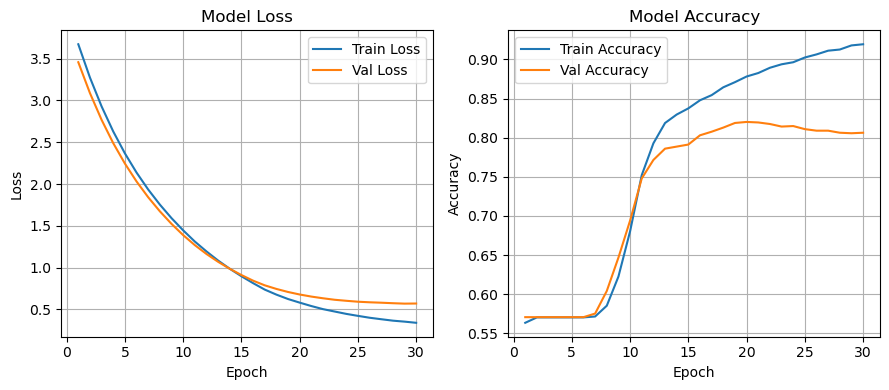

In [46]:
plot_model_history(rnn_tuner_model_history)

From above plot, we can see that both the training loss and validation loss are very smooth, so our tuning parameters are about optimal. The validation accuracy increases significantly at first but then flattens out and shows little to no further improvement. The optimal number of traning epoch is 20.

**Classification Report & Confusion Matrix**

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Classification Report:
              precision    recall  f1-score   support

Not Disaster       0.80      0.91      0.85       869
    Disaster       0.85      0.70      0.77       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523



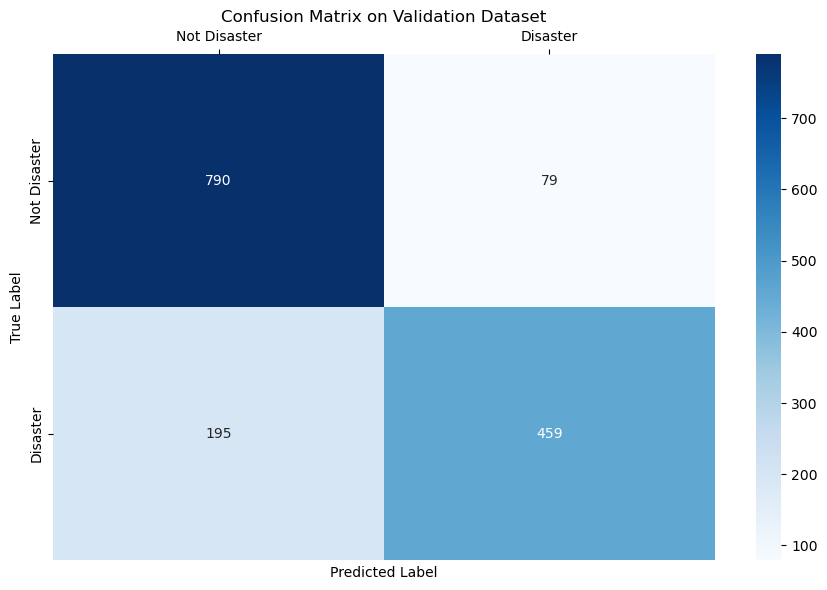

In [47]:
rnn_tuner_model = models.load_model(f'rnn-tuner.keras')
y_val_prob = rnn_tuner_model.predict(tfds_val, batch_size=BATCH_SIZE, verbose=1)
y_val_pred = (y_val_prob >= 0.5).astype(int).flatten()
print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=['Not Disaster', 'Disaster']))
# Plot confusion matrix result
plot_confusion_matrix_result(y_val, y_val_pred, labels=['Not Disaster', 'Disaster'], dataset='Validation')

**Submission & Test Results**

In [48]:
# Create kaggle submission
create_submission(rnn_tuner_model, tfds_test, df_test['id'].values, batch_size=BATCH_SIZE)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Submission file: submission-rnn-tuner.csv

Sample of submission content:
   id  target
0   0       1
1   2       1
2   3       1
3   9       1
4  11       1


Kaggle Public Score: 0.79221

In [ ]:
# Collect model performance data
performance_data['model'].append('Tuning RNN')
performance_data['train_time'].append(int(time1))
performance_data['train_epoch'].append(len(rnn_tuner_model_history.epoch))
performance_data['val_accuracy'].append(accuracy_score(y_val, y_val_pred))
performance_data['val_f1_score'].append(f1_score(y_val, y_val_pred))

### 3.6. Performance Comparison

In [53]:
# Kaggle public score
performance_data['test_score'] = [0.76984, 0.78547, 0.79221]
# Display performance data
performance_df = pd.DataFrame(performance_data)
print(performance_df)

        model  train_time  train_epoch  val_accuracy  val_f1_score  test_score
0  Simple RNN         170           11      0.791202      0.746815     0.76984
1         GRU          19            9      0.812213      0.771200     0.78547
2  Tuning RNN          50           30      0.820092      0.770134     0.79221


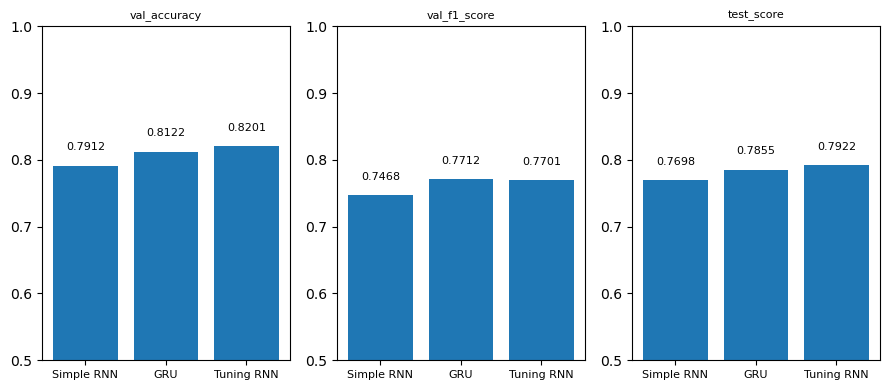

In [54]:
# Plot model comparisions
plt.figure(figsize=(9, 4))

metrics = ['val_accuracy', 'val_f1_score', 'test_score']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    ax = plt.bar(performance_df['model'].values, performance_df[metric])
    for p in ax.patches:
        count = p.get_height()
        ptitle = f'{count:,.04f}'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.text(x, y + 0.02, ptitle, ha='center', va='bottom', fontsize=8)
    plt.title(metric, fontsize=8)
    plt.xticks(fontsize=8)
    plt.ylim(0.5,1.0)
    
plt.tight_layout()
plt.show()

## 4. Summary

In this project, we explored the Disaster Tweets dataset. We inspected and analyzed keywords, hashtags, mentions, tweet length, etc. We cleaned and processed text, vectorized and transfromed the raw text into sequences, and prepared tensorflow datasets to train and test our models. We built our deep learning models to detect whether a tweet is about a real disaster based on the related keywords and tweet content using recurrent neural networks (RNN). We tried both vanilla RNN and Gated Recurrent Unit (GRU) models. Finally we used keras_tuner to find the optimal model by tuning the model hyperparameters including: Number of GRU units, Dropout and learning rate. 

Learnings and takeaways:

From the results, we see that GRU work much better than basic, vanilla RNN. We were able to improve the test score from 0.7698 to 0.7922 by tuning model hyperparameters. Applying techniques such as early stopping can help shorten training time.

Further enhancements: Here are things I would like to try:

- Data Augmentation: I would like to apply data augmentation techniques (such as NLPAug) to address our dataset. As we can see our dataset is slightly imbalanced and it's fairly small. By generating more data from our training dataset, this can help the model generalize better to variations in real-world data. 
- Transfer Learning: Leveraging wellknown powerful pre-trained language models such as BERT (Bidirectional Encoder Representations from Transformers) or it's lighter verion DistilBERT (Distilled Bidirectional Encoder Representations from Transformers").

## 5. Kaggle Public Score

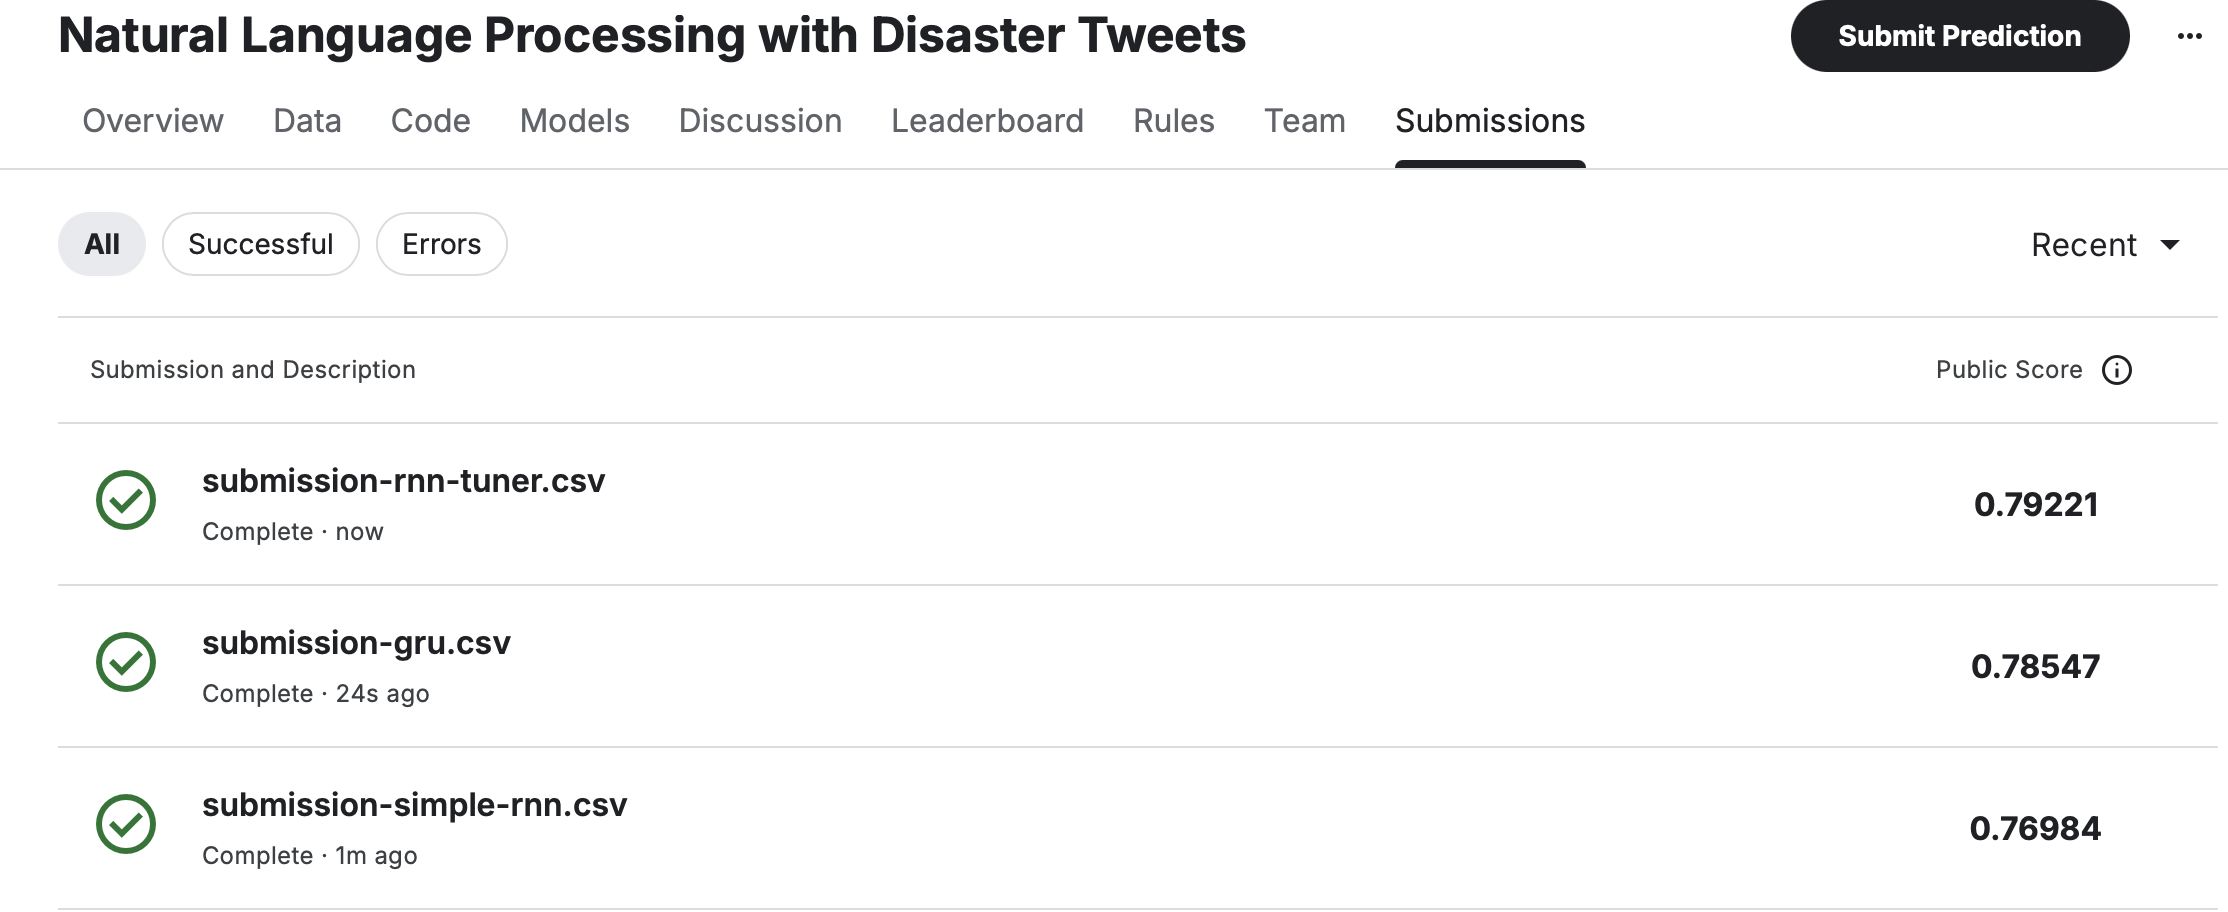

## 5. Project's GitHub Repository

This notebook is available here: [https://github.com/dongndp/nlp-disaster-tweets](https://github.com/dongndp/nlp-disaster-tweets).